In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### 훈련/검증/테스트 분리
from sklearn.model_selection import train_test_split

### 결정트리
from sklearn.tree import DecisionTreeClassifier

### 교차검증
from sklearn.model_selection import cross_validate

### 교차검증 -> KFold 라이브러리
from sklearn.model_selection import StratifiedKFold

### AutoML(그리드서치) 라이브러리
from sklearn.model_selection import GridSearchCV

### AutoML(랜덤서치) 라이브러리
from sklearn.model_selection import RandomizedSearchCV

### 랜덤서치에서 사용할 확률분포 데이터 생성 라이브러리
from scipy.stats import randint, uniform

### 로지스틱
from sklearn.linear_model import LogisticRegression

### 스케일링
from sklearn.preprocessing import StandardScaler


### SGD
from sklearn.linear_model import SGDClassifier

from matplotlib import font_manager, rc
import platform

### 라이브러리
# 트위터 형태소 분석기
from konlpy.tag import Okt

# 워드 카운터(단어 빈도)
from collections import Counter

# 시각화
import matplotlib.pyplot as plt

# 워드클라우드 시각화
from wordcloud import WordCloud

# 한글처리
import platform

# 한글 폰트 패스 설정(운영체제 윈도우의 경우)
font_path = "c:/Windows/Fonts/malgun.ttf"

### OS(운영체제)가 윈도우인 경우 적용 폰트
if platform.system() == "Windows" :
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc("font", family = font_name)

### OS(운영체제)가 Mac인 경우 적용 폰트
elif platform.system() == "Darwin" :
    rc("font", family = "AppleGothic")
### OS(운영체제)가 없네...
else:
    print("Check your OS system...")


In [2]:
#######[파일명변경]#######
df = pd.read_csv("./data/review_concat_rating_revised.csv")
#########################



In [3]:
df

,Unnamed: 0,restaurant_name,review_content,rating,date,visit,register,category
0,0,전포동 베이비치크,아기자기하고 빈티지한 분위기가 좋았어요ㅎㅎ 명란청양오일파스타랑 트러플버섯크림리조또 ...,NaN,2023-08-02,1,영수증,양식
1,1,전포동 베이비치크,입구부터 이쁜 공간이 너무 많아서 좋았던 이곳 취향저격 제대로 당해서 안으로 들어왔...,NaN,2023-08-01,1,영수증,양식
2,2,전포동 베이비치크,와..오랜만에 너무 만족스러운 식사하고 왔어여ㅠ 매장 분위기도 너무 좋고 예쁘신 사...,NaN,2023-07-24,1,영수증,양식
3,3,전포동 베이비치크,지난번에 너무 맛있게 먹고 이번에 재방문했어요! 베이비치크 플레이트는 진짜 무조건 ...,NaN,2023-08-09,1,영수증,양식
4,4,전포동 베이비치크,양 진짜 많고 너무 맛있어요ㅠㅠ 안에도 아기자기 앤티크하게 잘 꾸며져있고ㅠㅠㅠ 감성...,NaN,2023-07-05,1,영수증,양식
...,...,...,...,...,...,...,...,...
116259,116259,양정동 명심이족발,맛있어요,5.0,2020-12-19,1,영수증,"족발,보쌈"
116260,116260,양정동 명심이족발,맛있고 양도 많았어요!,5.0,2020-12-25,2,영수증,"족발,보쌈"
116261,116261,양정동 명심이족발,좋아요,3.5,2020-10-29,1,영수증,"족발,보쌈"
116262,116262,양정동 명심이족발,맛있어요,3.5,2019-12-15,1,영수증,"족발,보쌈"


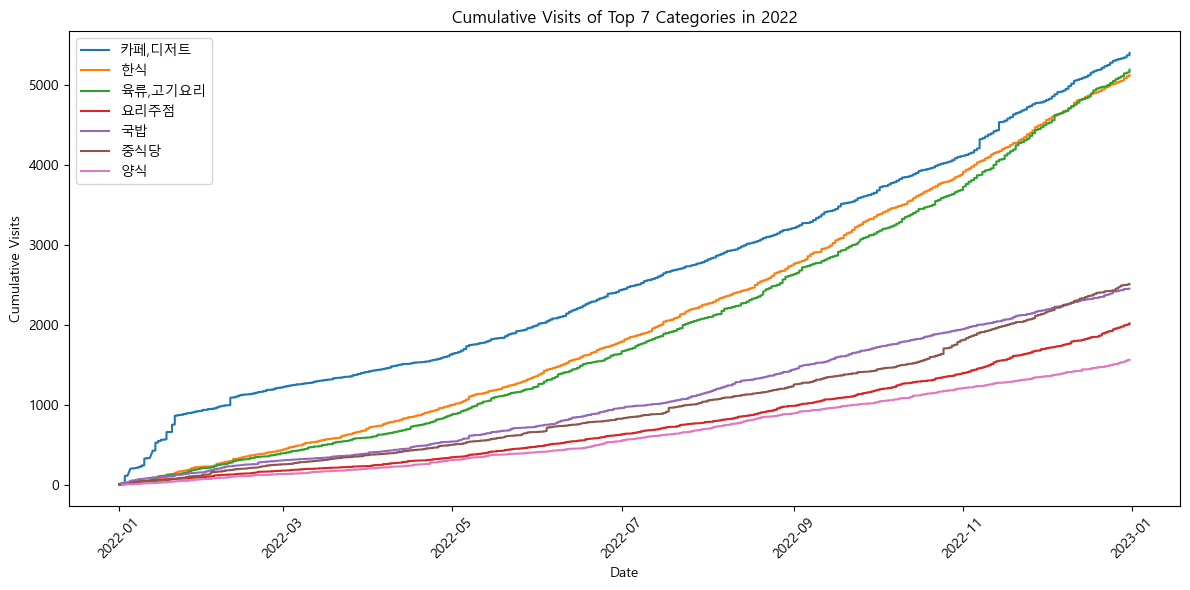

In [4]:
import pandas as pd
import matplotlib.pyplot as plt



# 날짜 컬럼을 datetime 형식으로 변환
df["date"] = pd.to_datetime(df["date"])

# 2022년 데이터 선택
df_2022 = df[df["date"].dt.year == 2022]

# 날짜별 누적 방문 횟수 계산
df_2022 = df_2022.sort_values(by="date")
df_2022["cumulative_visits"] = df_2022.groupby("category")["visit"].cumsum()

# 상위 7개 카테고리 선정
top_categories = df_2022["category"].value_counts().head(7).index

# 상위 7개 카테고리 데이터만 추출
df_2022_top7 = df_2022[df_2022["category"].isin(top_categories)]

# 그래프 그리기
plt.figure(figsize=(12, 6))

for category in top_categories:
    category_data = df_2022_top7[df_2022_top7["category"] == category]
    plt.plot(category_data["date"], category_data["cumulative_visits"], label=category)

plt.title("Cumulative Visits of Top 7 Categories in 2022")
plt.xlabel("Date")
plt.ylabel("Cumulative Visits")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8276\2207210267.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022["month"] = df_2022["date"].dt.month


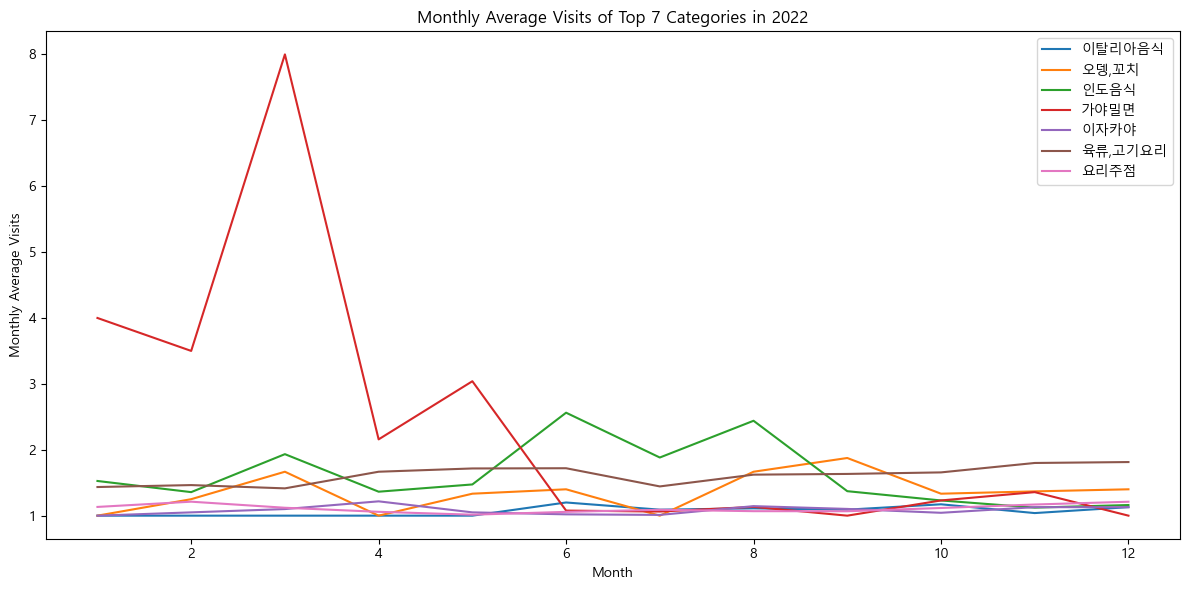

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 읽어오기 (생략)

# 날짜 컬럼을 datetime 형식으로 변환
df["date"] = pd.to_datetime(df["date"])

# 2022년 데이터 선택
df_2022 = df[df["date"].dt.year == 2022]

# 월별 방문 평균 계산
df_2022["month"] = df_2022["date"].dt.month
monthly_avg_visits = df_2022.groupby(["month", "category"])["visit"].mean().reset_index()

# 상위 7개 카테고리 선정
top_categories = monthly_avg_visits["category"].value_counts().head(7).index

# 상위 7개 카테고리 데이터만 추출
top_categories_data = monthly_avg_visits[monthly_avg_visits["category"].isin(top_categories)]

# 그래프 그리기
plt.figure(figsize=(12, 6))

for category in top_categories:
    category_data = top_categories_data[top_categories_data["category"] == category]
    plt.plot(category_data["month"], category_data["visit"], label=category)

plt.title("Monthly Average Visits of Top 7 Categories in 2022")
plt.xlabel("Month")
plt.ylabel("Monthly Average Visits")
plt.legend()
plt.tight_layout()
plt.show()

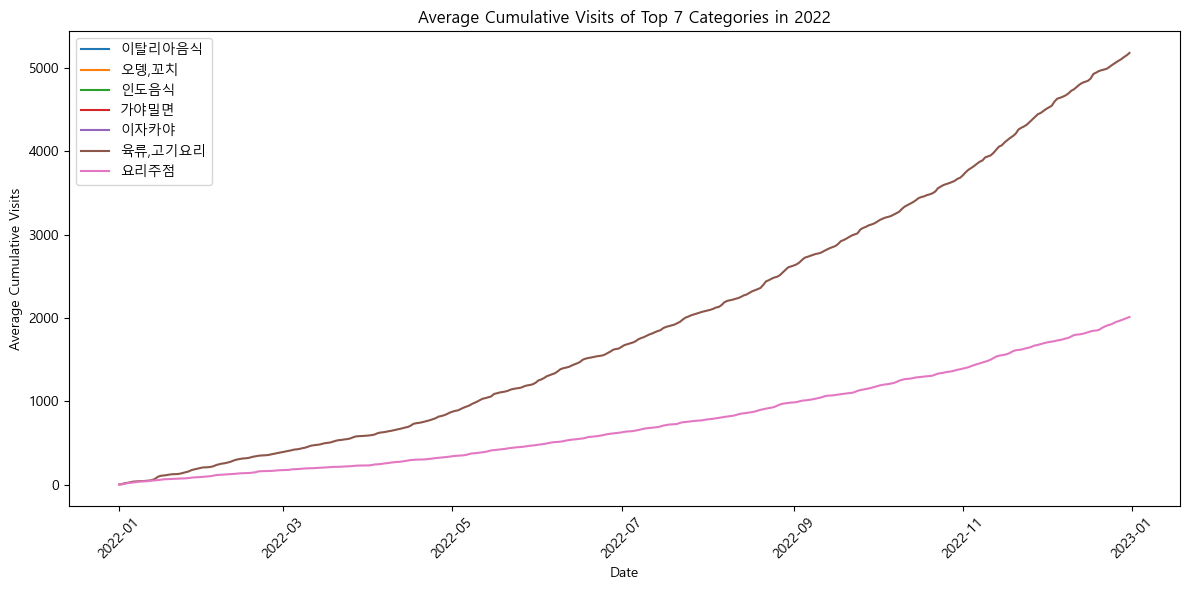

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 날짜 컬럼을 datetime 형식으로 변환 (생략)

# ... (이하 코드 동일)

# 각 카테고리별 날짜별 평균 누적 방문 횟수 계산
category_avg_data = df_2022_top7.groupby(['category', 'date'])['cumulative_visits'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))

for category in top_categories:
    category_data = category_avg_data[category_avg_data["category"] == category]
    plt.plot(category_data["date"], category_data["cumulative_visits"], label=category)

plt.title("Average Cumulative Visits of Top 7 Categories in 2022")
plt.xlabel("Date")
plt.ylabel("Average Cumulative Visits")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
